In [1]:
# Моделирование двойного математического маятника методом Эйлера и Рунге-Кутты #
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.integrate import solve_ivp

In [2]:
# PHYSICS #
L1 = random.randint(1, 5)
L2 = random.randint(1, 5)
M1 = random.randint(1, 5)
M2 = random.randint(1, 5)

G = 9.8

In [3]:
def Hamiltonian(s):
    q1,q2,p1,p2 = s

    f = L1*L2*(M1+M2*np.sin(q1-q2)**2)

    return (M2*L2**2*p1**2 + (M1+M2)*L1**2*p2**2 - 2*M2*L1*L2*p1*p2*np.cos(q1-q2) )/(2*M2*L1*L2*f) - \
       (M1+M2)*G*L1*np.cos(q1) - M2*G*L2*np.cos(q2)

In [4]:
# Решаем уравнение s' = D(s) #

def D(s):
    q1,q2,p1,p2 = s

    f = L1*L2*(M1+M2*np.sin(q1-q2)**2)

    h1 = p1*p2*np.sin(q1-q2)/f
    h2 = (M2*L2**2*p1**2 + (M1+M2)*L1**2*p2**2 - 2*M2*L1*L2*p1*p2*np.cos(q1-q2))/(2*f**2)

    return np.array((
        (L2*p1 - L1*np.cos(q1-q2)*p2 )/(L1*f),

        (-M2*L2*np.cos(q1-q2)*p1 + (M1+M2)*L1*p2)/(M2*L2*f),

        -(M1+M2)*G*L1*np.sin(q1) - h1 + h2*np.sin(2*(q1-q2)),

        -M2*G*L2*np.sin(q2) + h1 - h2*np.sin(2*(q1-q2))
    ))

In [5]:
# METHOD #

def RK4_step(s):
    d1 = DeltaT*D(s)
    d2 = DeltaT*D(s+d1/2)
    d3 = DeltaT*D(s+d2/2)
    d4 = DeltaT*D(s+d3)

    return s + ( d1 + 2*d2 + 2*d3 + d4 )/6

In [6]:
Q1_0 = 3.14/2
Q2_0 = 0
P1_0 = 0
P2_0 = 0
S_0 = np.array((Q1_0, Q2_0, P1_0, P2_0), dtype=np.float32)

# NUMERIC #

DeltaT = 0.01
T_min, T_max = 0, 5
StepsNumber = int( (T_max-T_min) / DeltaT )

# Make state history array
StateHistory = np.zeros((4, StepsNumber+1), dtype=np.float32)
StateHistory[: ,0] = S_0

TimeAxes = np.linspace(T_min, T_max, StepsNumber+1)

In [7]:
## Euler ##
for i in range(StepsNumber):
    StateHistory[:,i+1] = RK4_step(StateHistory[:,i])

## scipy #
#StateHistory[:] = solve_ivp(fun=D, t_span=(T_min, T_max), y0=S_0, method='RK45', t_eval=TimeAxes, first_step=DeltaT, max_step=DeltaT).y

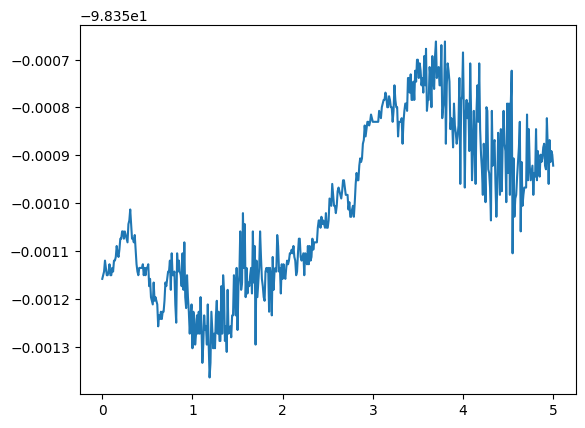

In [8]:
plt.plot(TimeAxes, Hamiltonian(StateHistory))
plt.show()

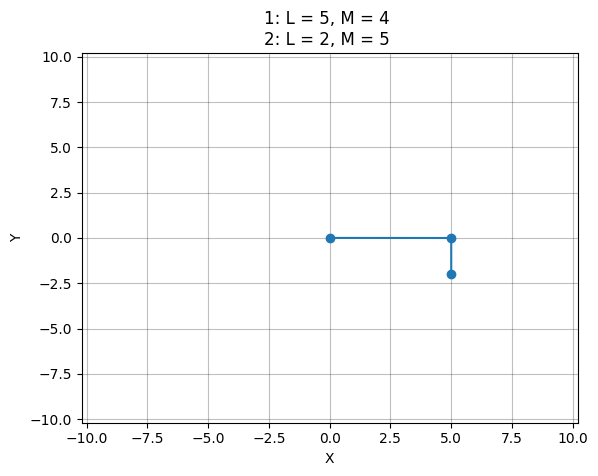

In [9]:
Q1History = StateHistory[0]
Q2History = StateHistory[1]

Fig, Ax = plt.subplots()
Ax.set_title('1: L = {:}, M = {:} \n2: L = {:}, M = {:} '.format(L1, M1, L2, M2))

PendeliumPlot = Ax.plot([], [],  marker='o')[0]

Ax.set_xlim(-10.2, 10.2)
Ax.set_ylim(-10.2, 10.2)
Ax.grid(color = 'black', alpha = 0.25)
Ax.set(xlabel='X', ylabel='Y')

def loop_animation(i):
    """ Главный цикл вычисления/анимации """

    PendeliumPlot.set_data([
        0, L1*np.sin(Q1History[i]), L1*np.sin(Q1History[i]) + L2*np.sin(Q2History[i])
    ], [
        0, -L1*np.cos(Q1History[i]), -L1*np.cos(Q1History[i]) - L2*np.cos(Q2History[i])
    ])

    return (PendeliumPlot)

ani = animation.FuncAnimation(
    fig=Fig, 
    func=loop_animation, 
    frames=StepsNumber, 
    interval=1
)

In [10]:
writer = animation.PillowWriter(fps=60)
ani.save("double_pendulum.gif", writer=writer)